<a href="https://colab.research.google.com/github/Mekyyy/Metodology-Data-Science/blob/main/Tugas_Model_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Means

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [17]:
dataset = pd.read_csv('Customer.csv')
X = dataset.iloc[:, [1,2,3]].values
data = X[:, 1:4].astype(float)

In [20]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [26]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

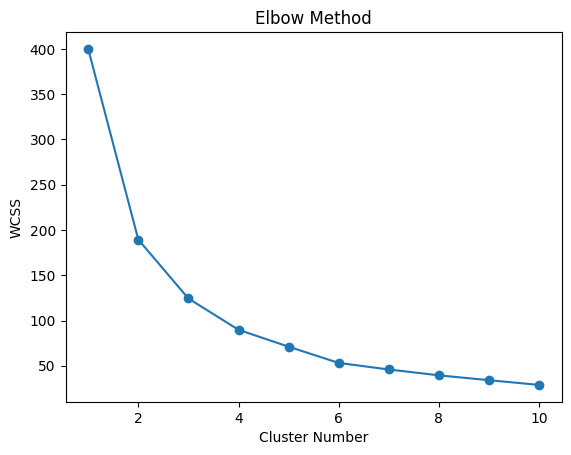

In [27]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()

In [33]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


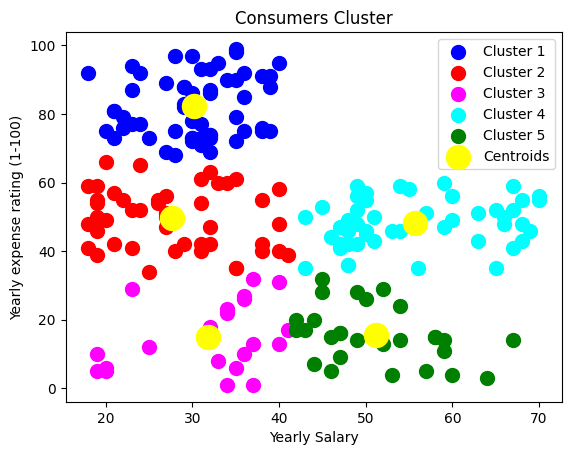

In [35]:
plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s = 100, c = 'blue', label= 'Cluster 1')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s = 100, c = 'red', label= 'Cluster 2')
plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], s = 100, c = 'magenta',label = 'Cluster 3')
plt.scatter(data[y_kmeans == 3, 0], data[y_kmeans == 3, 1], s = 100, c = 'cyan', label= 'Cluster 4')
plt.scatter(data[y_kmeans == 4, 0], data[y_kmeans == 4, 1], s = 100, c = 'green',label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s =300, c = 'yellow', label = 'Centroids')
plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.legend()

#Hierachical

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

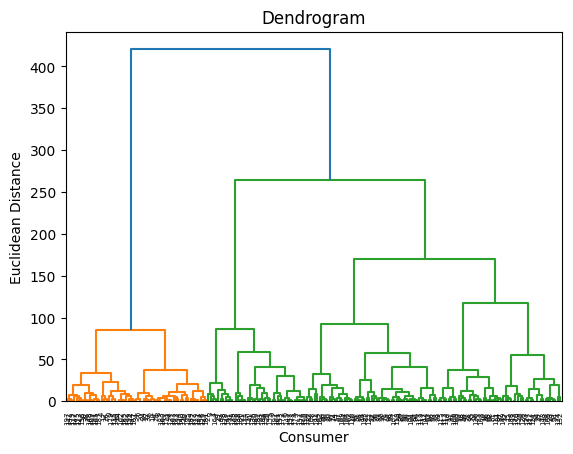

In [37]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Consumer')
plt.ylabel('Euclidean Distance')
plt.show()

In [39]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


#Comparassion

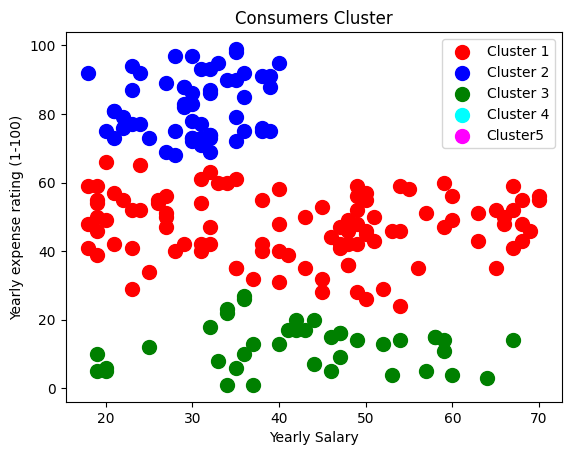

In [41]:
plt.scatter(data[y_hc == 0, 0], data[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data[y_hc == 1, 0], data[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data[y_hc == 2, 0], data[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data[y_hc == 3, 0], data[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(data[y_hc == 4, 0], data[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster5')
plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.legend()
plt.show()